In [2]:
#Survival Analysis of Titanic Dataset
# In this project, I explore the Titanic dataset to understand which factors influenced passenger survival rates.

# Objectives:
# - Analyze passenger age, sex, class
# - Find relationships between variables and survival
# - Summarize key insights for future predictive modeling


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.drop(['Cabin'],axis=1,inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

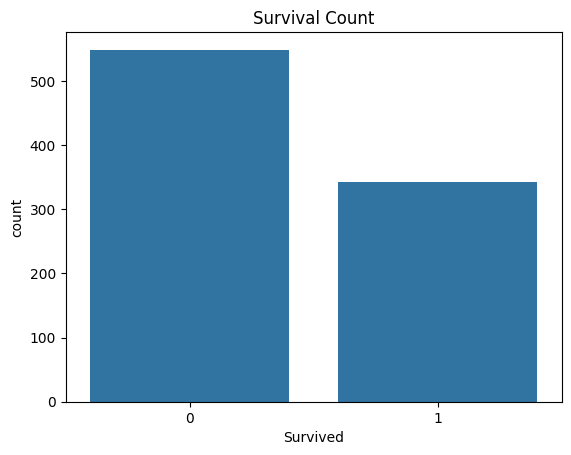

In [19]:
sns.countplot(x='Survived',data=df)
plt.title('Survival Count')
plt.show()

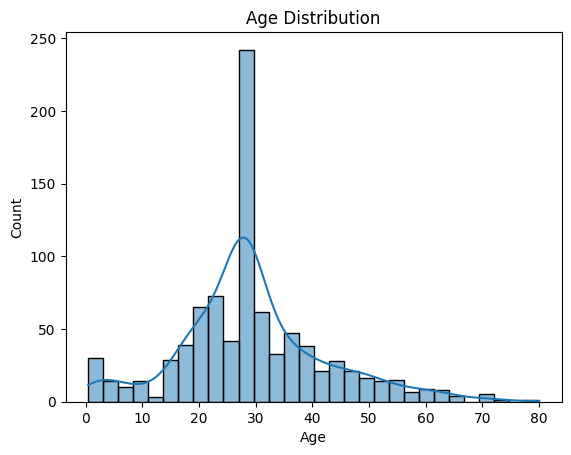

In [25]:
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

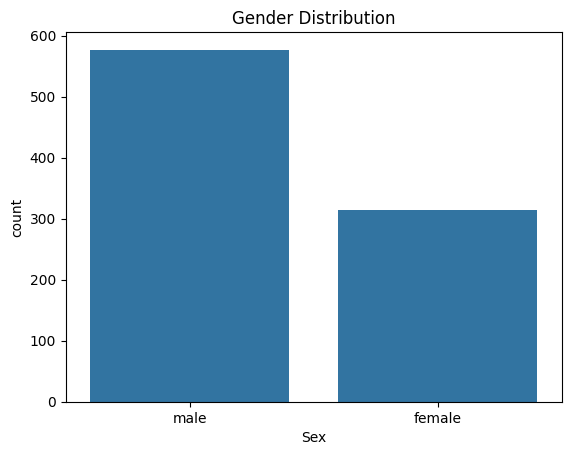

In [27]:
sns.countplot(x='Sex',data=df)
plt.title("Gender Distribution")
plt.show()

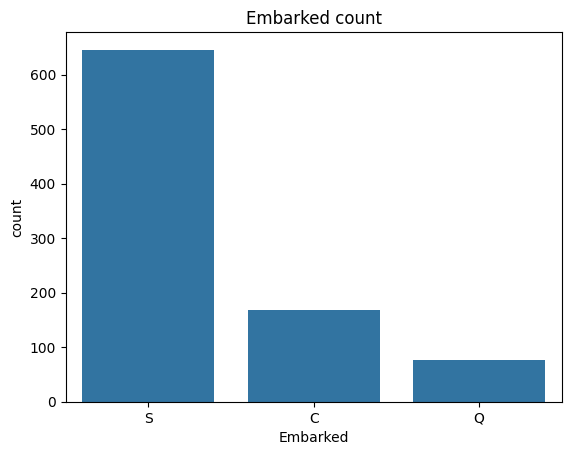

In [28]:
sns.countplot(x='Embarked',data=df)
plt.title("Embarked count")
plt.show()

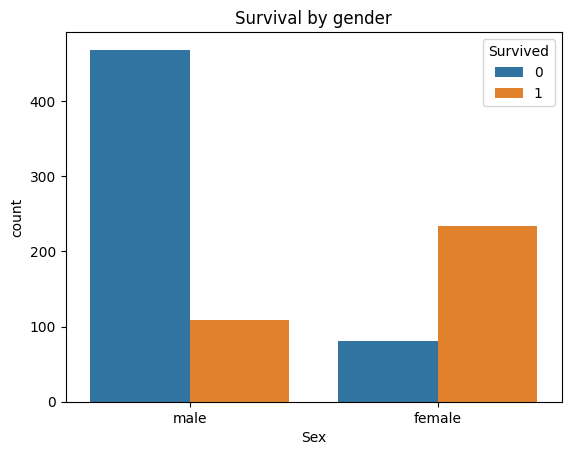

In [29]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title('Survival by gender')
plt.show()

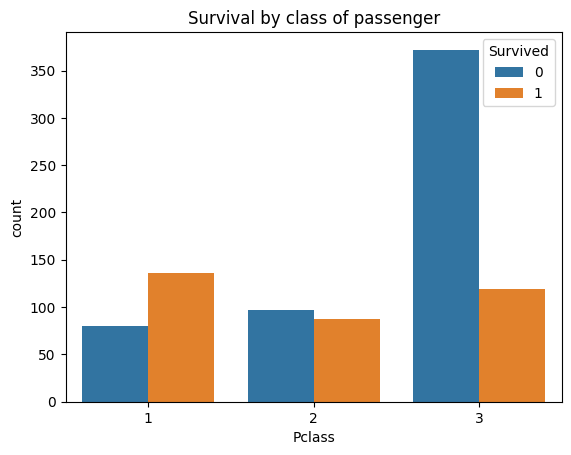

In [31]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Survival by class of passenger')
plt.show()

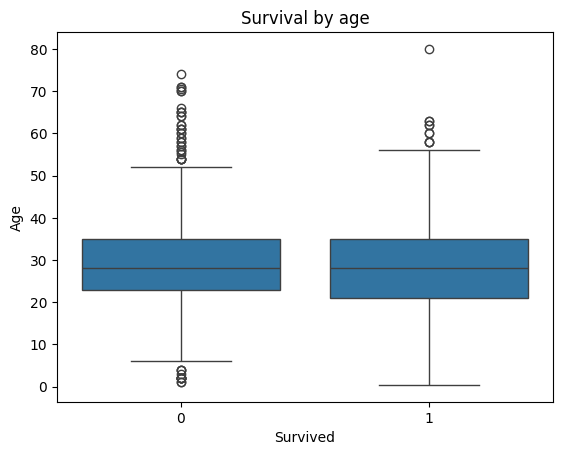

In [34]:
sns.boxplot(x='Survived',y='Age',data=df)
plt.title('Survival by age')
plt.show()

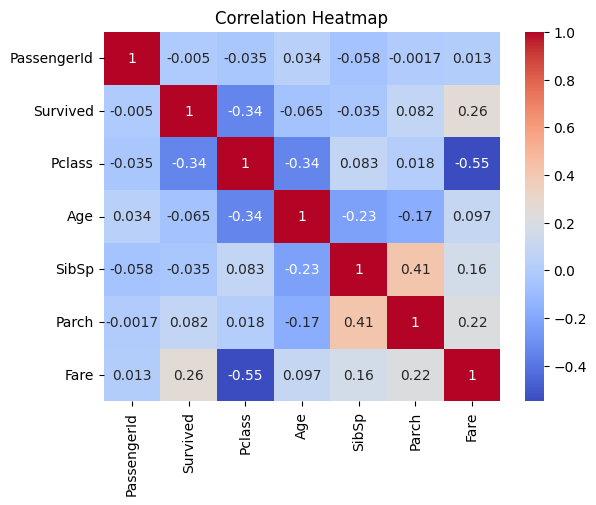

In [39]:

numeric_df = df.select_dtypes(include=['float64', 'int64']) # Numeric data types are selected

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# One hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [42]:
# Features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)*100

79.88826815642457

In [54]:
confusion_matrix(y_test,y_pred)*100

array([[8800, 1700],
       [1900, 5500]])

In [55]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83       105\n           1       0.76      0.74      0.75        74\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'